<h1 style="text-align: center;">MSDA Capstone Project</h1>
<h2 style="text-align: center;">ITSCM 778-22 Course Project</h2>
<h3 style="text-align: center;">Jennifer Arneson</h3>
<h4 style="text-align: center;">December 11, 2024</h4>

<h4 style="text-align: left;">Load & Clean Data</h4>

In [1]:
# Import required libraries
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/jen/Downloads/wine_quality.csv'
wine_data = pd.read_csv(file_path)

In [2]:
# Overview of the dataset
print("Dataset Overview:")
print(wine_data.info())
print("\nFirst 5 Rows of Data:")
print(wine_data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  High_quality          4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None

First 5 Rows of Data:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0 

In [3]:
# Check for null values and duplicates
print("\nNull Values in Each Column:")
print(wine_data.isnull().sum())
print("\nNumber of Duplicate Rows:")
print(wine_data.duplicated().sum())

# Remove duplicates
wine_data_cleaned = wine_data.drop_duplicates()
print("\nShape after removing duplicates:", wine_data_cleaned.shape)


Null Values in Each Column:
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
High_quality            0
dtype: int64

Number of Duplicate Rows:
937

Shape after removing duplicates: (3961, 12)


# Wine Quality Prediction – Capstone Project

In [4]:
# Save cleaned dataset
output_dir = '/Users/jen/Downloads'
cleaned_file_path = os.path.join(output_dir, 'wine_quality_cleaned.csv')
wine_data_cleaned.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")

Cleaned dataset saved to /Users/jen/Downloads/wine_quality_cleaned.csv


<h4 style="text-align: left;">Data Analysis & Insights</h4>

In [5]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(wine_data_cleaned.describe())


Descriptive Statistics:
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    3961.000000       3961.000000  3961.000000     3961.000000   
mean        6.839346          0.280538     0.334332        5.914819   
std         0.866860          0.103437     0.122446        4.861646   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.330000     0.390000        8.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  3961.000000          3961.000000           3961.000000  3961.000000   
mean      0.045905            34.889169            137.193512     0.993790   
std       0.023103            17.210021             43.129065     0.002905   
min       0.009000     

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/Users/jen/Downloads/wine_quality_cleaned.csv')

# Set default aesthetics for seaborn
sns.set(style="whitegrid")

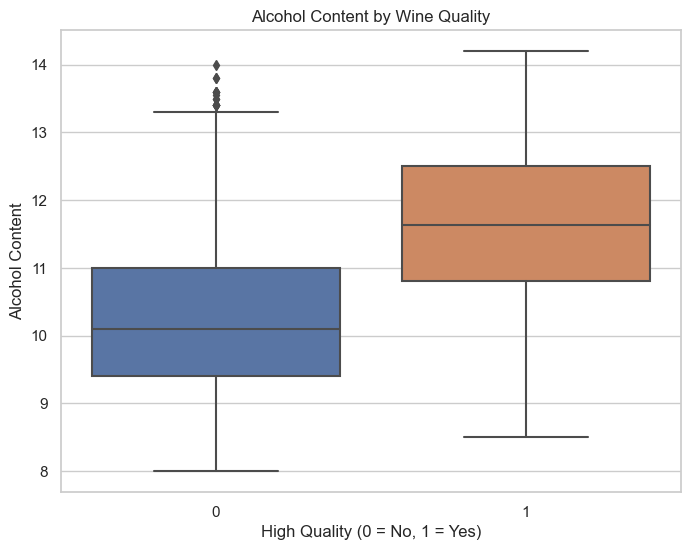

In [7]:
# Box plot distribution of alcohol content by wine quality
plt.figure(figsize=(8, 6))
sns.boxplot(x='High_quality', y='alcohol', data=wine_data_cleaned)
plt.title('Alcohol Content by Wine Quality')
plt.xlabel('High Quality (0 = No, 1 = Yes)')
plt.ylabel('Alcohol Content')
plt.show()

## 1. Introduction

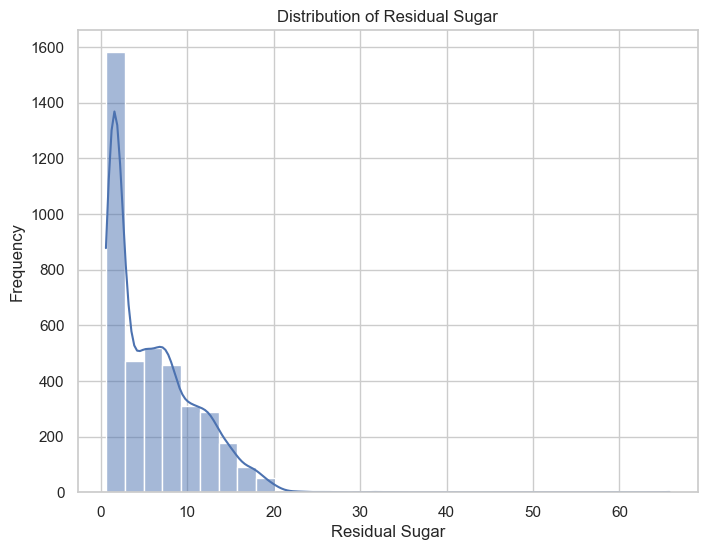

In [8]:
# Histogram of residual sugar
plt.figure(figsize=(8, 6))
sns.histplot(wine_data_cleaned['residual_sugar'], kde=True, bins=30)
plt.title('Distribution of Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Frequency')
plt.show()

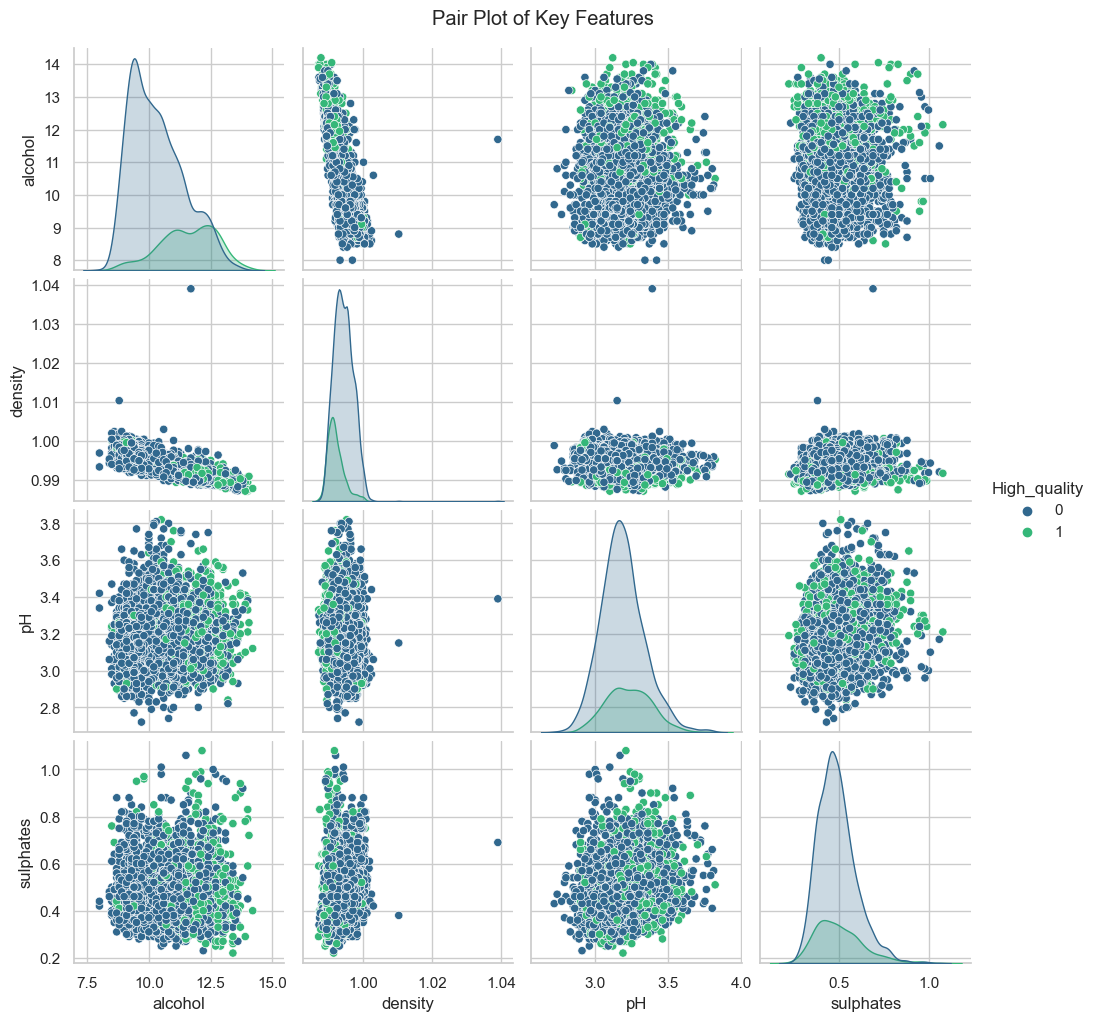

In [9]:
# Pair plot of key features
key_features = ['alcohol', 'density', 'pH', 'sulphates', 'High_quality']
sns.pairplot(wine_data_cleaned[key_features], hue='High_quality', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

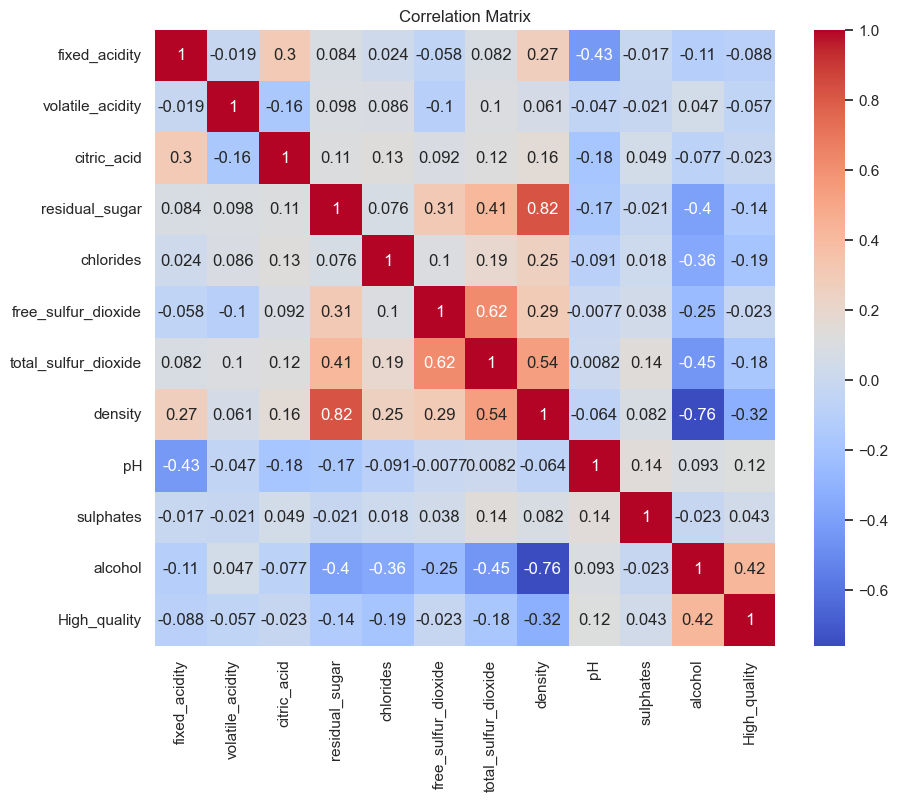

In [10]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = wine_data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Data Preprocessing & Feature Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = wine_data_cleaned.drop(columns=['High_quality'])
y = wine_data_cleaned['High_quality']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)


<h1 style="text-align: left;">Problem 1: Wine Quality Prediction (Classification)</h1>

<h3 style="text-align: left;">Model 1: Logistic Regression</h3>

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

In [15]:
# Create a Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],       # Type of regularization
    'solver': ['liblinear']        # Solver that supports L1 and L2 penalties
}

grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
grid_lr.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='roc_auc')

In [16]:
# Evaluate the best model
best_log_reg = grid_lr.best_estimator_
y_pred_lr = best_log_reg.predict(X_test_scaled)
y_prob_lr = best_log_reg.predict_proba(X_test_scaled)[:, 1]

In [17]:
print("Logistic Regression Best Parameters:", grid_lr.best_params_)
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_lr))

Logistic Regression Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.83      0.95      0.89       618
           1       0.64      0.29      0.40       175

    accuracy                           0.81       793
   macro avg       0.73      0.62      0.64       793
weighted avg       0.78      0.81      0.78       793

Accuracy: 0.807061790668348
ROC AUC Score: 0.8294498381877022


## 2. Data Overview

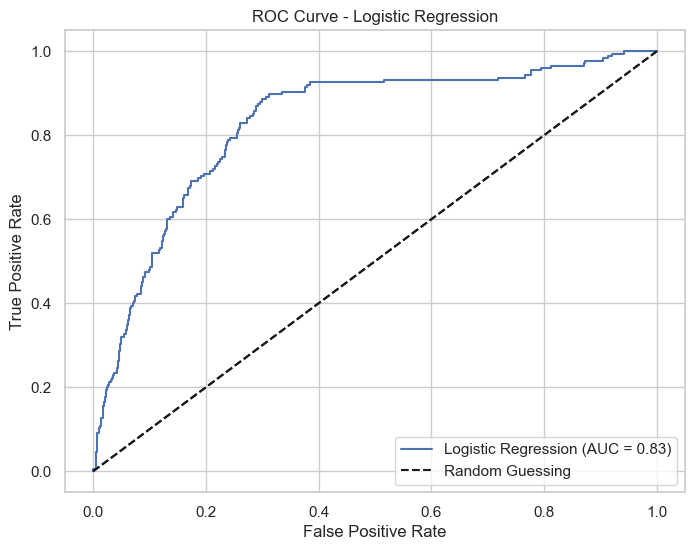

In [18]:
# Plot ROC Curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_lr)))
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Baseline
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

<h3 style="text-align: left;">Model 2: Random Forest</h3>


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       618
           1       0.65      0.31      0.42       175

    accuracy                           0.81       793
   macro avg       0.74      0.63      0.65       793
weighted avg       0.79      0.81      0.78       793

Accuracy: 0.8108448928121059
ROC AUC Score: 0.8523994452149792


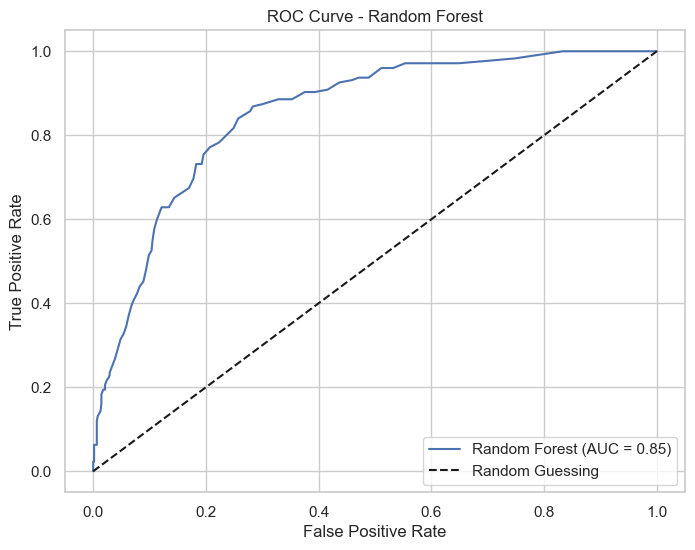

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train random forest model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


In [20]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform grid search
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best model evaluation
best_rf = grid_rf.best_estimator_
y_pred_rf_best = best_rf.predict(X_test)
y_prob_rf_best = best_rf.predict_proba(X_test)[:, 1]

print("\nRandom Forest Best Parameters:", grid_rf.best_params_)
print("\nRandom Forest Performance (After Tuning):")
print(classification_report(y_test, y_pred_rf_best))
print("Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf_best))


Random Forest Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Random Forest Performance (After Tuning):
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       618
           1       0.69      0.31      0.43       175

    accuracy                           0.82       793
   macro avg       0.76      0.64      0.66       793
weighted avg       0.80      0.82      0.79       793

Accuracy: 0.8171500630517023
ROC AUC Score: 0.8609153952843274


In [21]:
# Parameter Tuning
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform grid search
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best model evaluation
best_rf = grid_rf.best_estimator_
y_pred_rf_best = best_rf.predict(X_test)
y_prob_rf_best = best_rf.predict_proba(X_test)[:, 1]

print("\nRandom Forest Best Parameters:", grid_rf.best_params_)
print("\nRandom Forest Performance (After Tuning):")
print(classification_report(y_test, y_pred_rf_best))
print("Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf_best))



Random Forest Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Random Forest Performance (After Tuning):
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       618
           1       0.69      0.31      0.43       175

    accuracy                           0.82       793
   macro avg       0.76      0.64      0.66       793
weighted avg       0.80      0.82      0.79       793

Accuracy: 0.8171500630517023
ROC AUC Score: 0.8609153952843274


<h3 style="text-align: left;">Classification Model Comparison</h3>

In [22]:
# Create a comparison table
models = ["Logistic Regression", "Random Forest (Default)", "Random Forest (Tuned)"]
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_rf_best)
]
roc_aucs = [
    roc_auc_score(y_test, y_prob_lr),
    roc_auc_score(y_test, y_prob_rf),
    roc_auc_score(y_test, y_prob_rf_best)
]

comparison_df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies,
    "ROC AUC": roc_aucs
})

print("\nModel Comparison:")
print(comparison_df)



Model Comparison:
                     Model  Accuracy   ROC AUC
0      Logistic Regression  0.807062  0.829450
1  Random Forest (Default)  0.810845  0.852399
2    Random Forest (Tuned)  0.817150  0.860915


In [23]:
# Evaluate the best model
best_log_reg = grid_lr.best_estimator_
y_pred_lr = best_log_reg.predict(X_test_scaled)
y_prob_lr = best_log_reg.predict_proba(X_test_scaled)[:, 1]

<h1 style="text-align: left;">Problem 2: Clustering Wines Based on Their Chemicals</h1>

<h3 style="text-align: left;">K-Means Clustering</h3>

## 3. Data Cleaning

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Scale the features
scaler = StandardScaler()

In [26]:
# Preprocess dataset for clustering
# Fit KMeans with the optimal number of clusters 
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
# Add the cluster labels to the original dataset for profiling
df['Cluster'] = clusters
# Profile the clusters
cluster_profiles = df.groupby('Cluster').mean()
print(cluster_profiles)

NameError: name 'k_values' is not defined

In [ ]:
# Visualize clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Exclude the target variable
features = df.drop(columns=['High_quality'])

In [ ]:
# Normalize the data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

## 4. Exploratory Data Analysis (EDA)

In [ ]:
# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++', n_init='auto')
    cluster_labels = kmeans.fit_predict(normalized_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(normalized_features, cluster_labels))

In [ ]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
wine_data_cleaned = wine_data.drop_duplicates().copy()

# Add cluster labels
wine_data_cleaned['Cluster'] = kmeans.labels_

In [ ]:
# Analyze cluster profiles
# Compute average values for key features by cluster
key_features = ['alcohol', 'density', 'pH', 'sulphates', 'residual_sugar']
cluster_profiles = wine_data_cleaned.groupby('Cluster')[key_features].mean()

# Display cluster profiles
print("Detailed Cluster Profiles (Average values for key features):")
print(cluster_profiles)

In [ ]:
# Visualize the cluster profiles
cluster_profiles.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Profiles - Average Key Features')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(title='Features')
plt.tight_layout()
plt.show()

In [ ]:
# Plotting the elbow curve
plt.figure(figsize=(10, 6))
print("k_range:", list(k_range))
print("inertia:", inertia)
print("Length of k_range:", len(k_range))
print("Length of inertia:", len(inertia))

plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

## 5. Feature Engineering

In [ ]:
# Plotting silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='orange')
plt.title('Silhouette Score Analysis')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# Specify n_init explicitly
kmeans = KMeans(n_clusters=4, random_state=42, init='k-means++', n_init=10)
cluster_labels = kmeans.fit_predict(normalized_features)
silhouette_avg = silhouette_score(normalized_features, cluster_labels)
print(f"Silhouette Score for k=4: {silhouette_avg}")

In [ ]:
# Apply KMeans with the best k (chosen based on elbow/silhouette)
optimal_k = 4
kmeans_best = KMeans(n_clusters=optimal_k, random_state=42, init='k-means++', n_init=10)
cluster_labels_best = kmeans_best.fit_predict(normalized_features)

In [ ]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(normalized_features)

plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels_best, cmap='viridis', alpha=0.7)
plt.title(f'KMeans Clustering with k={optimal_k}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

## 6. Model Training

## 7. Model Evaluation

## 8. Conclusion